## Linear Regression

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User15\OneDrive\Desktop\Data Analysis\data_problem_3.csv')
df.head()

,mfr,carline,car_truck,cid,rhp,trns,drv,od,etw,cmp,axle,n_v,a_c,hc,co,co2,mpg
0,20,300C/SRT-8,C,215,253,L5,4,2,4500,9.9,3.07,30.9,Y,0.011,0.09,288,30.8
1,20,CARAVAN 2WD,T,201,180,L4,F,2,4500,9.3,2.49,32.3,Y,0.014,0.11,274,32.5
2,20,CROSSFIRE ROADSTER,C,196,168,L5,R,2,3375,10.0,3.27,37.1,Y,0.001,0.02,250,35.4
3,20,DAKOTA PICKUP 2WD,T,226,210,L4,R,2,4500,9.2,3.55,29.6,Y,0.012,0.04,316,28.1
4,20,DAKOTA PICKUP 4WD,T,226,210,L4,4,2,5000,9.2,3.55,29.6,Y,0.011,0.05,365,24.4


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [12]:
#df.isnull()
df.describe()

,mfr,cid,rhp,od,etw,cmp,axle,n_v,hc,co,co2,mpg
count,21.0,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,20.0,238.904762,239.476190,2.0,4345.238095,9.433333,3.220000,32.400000,0.008476,0.105238,291.000000,29.547619
std,0.0,109.121906,103.410163,0.0,756.125777,0.391578,0.503061,5.829494,0.007387,0.113385,88.754155,5.707067
min,20.0,122.000000,132.000000,2.0,3000.000000,8.600000,2.490000,19.400000,0.000000,0.000000,0.000000,18.700000
25%,20.0,148.000000,168.000000,2.0,3625.000000,9.200000,2.690000,29.600000,0.003000,0.040000,260.000000,25.900000
50%,20.0,215.000000,210.000000,2.0,4500.000000,9.500000,3.070000,32.300000,0.007000,0.090000,295.000000,28.500000
75%,20.0,226.000000,249.000000,2.0,5000.000000,9.700000,3.550000,36.800000,0.011000,0.110000,337.000000,33.800000
max,20.0,500.000000,501.000000,2.0,6000.000000,10.000000,4.100000,41.000000,0.024000,0.430000,474.000000,41.300000


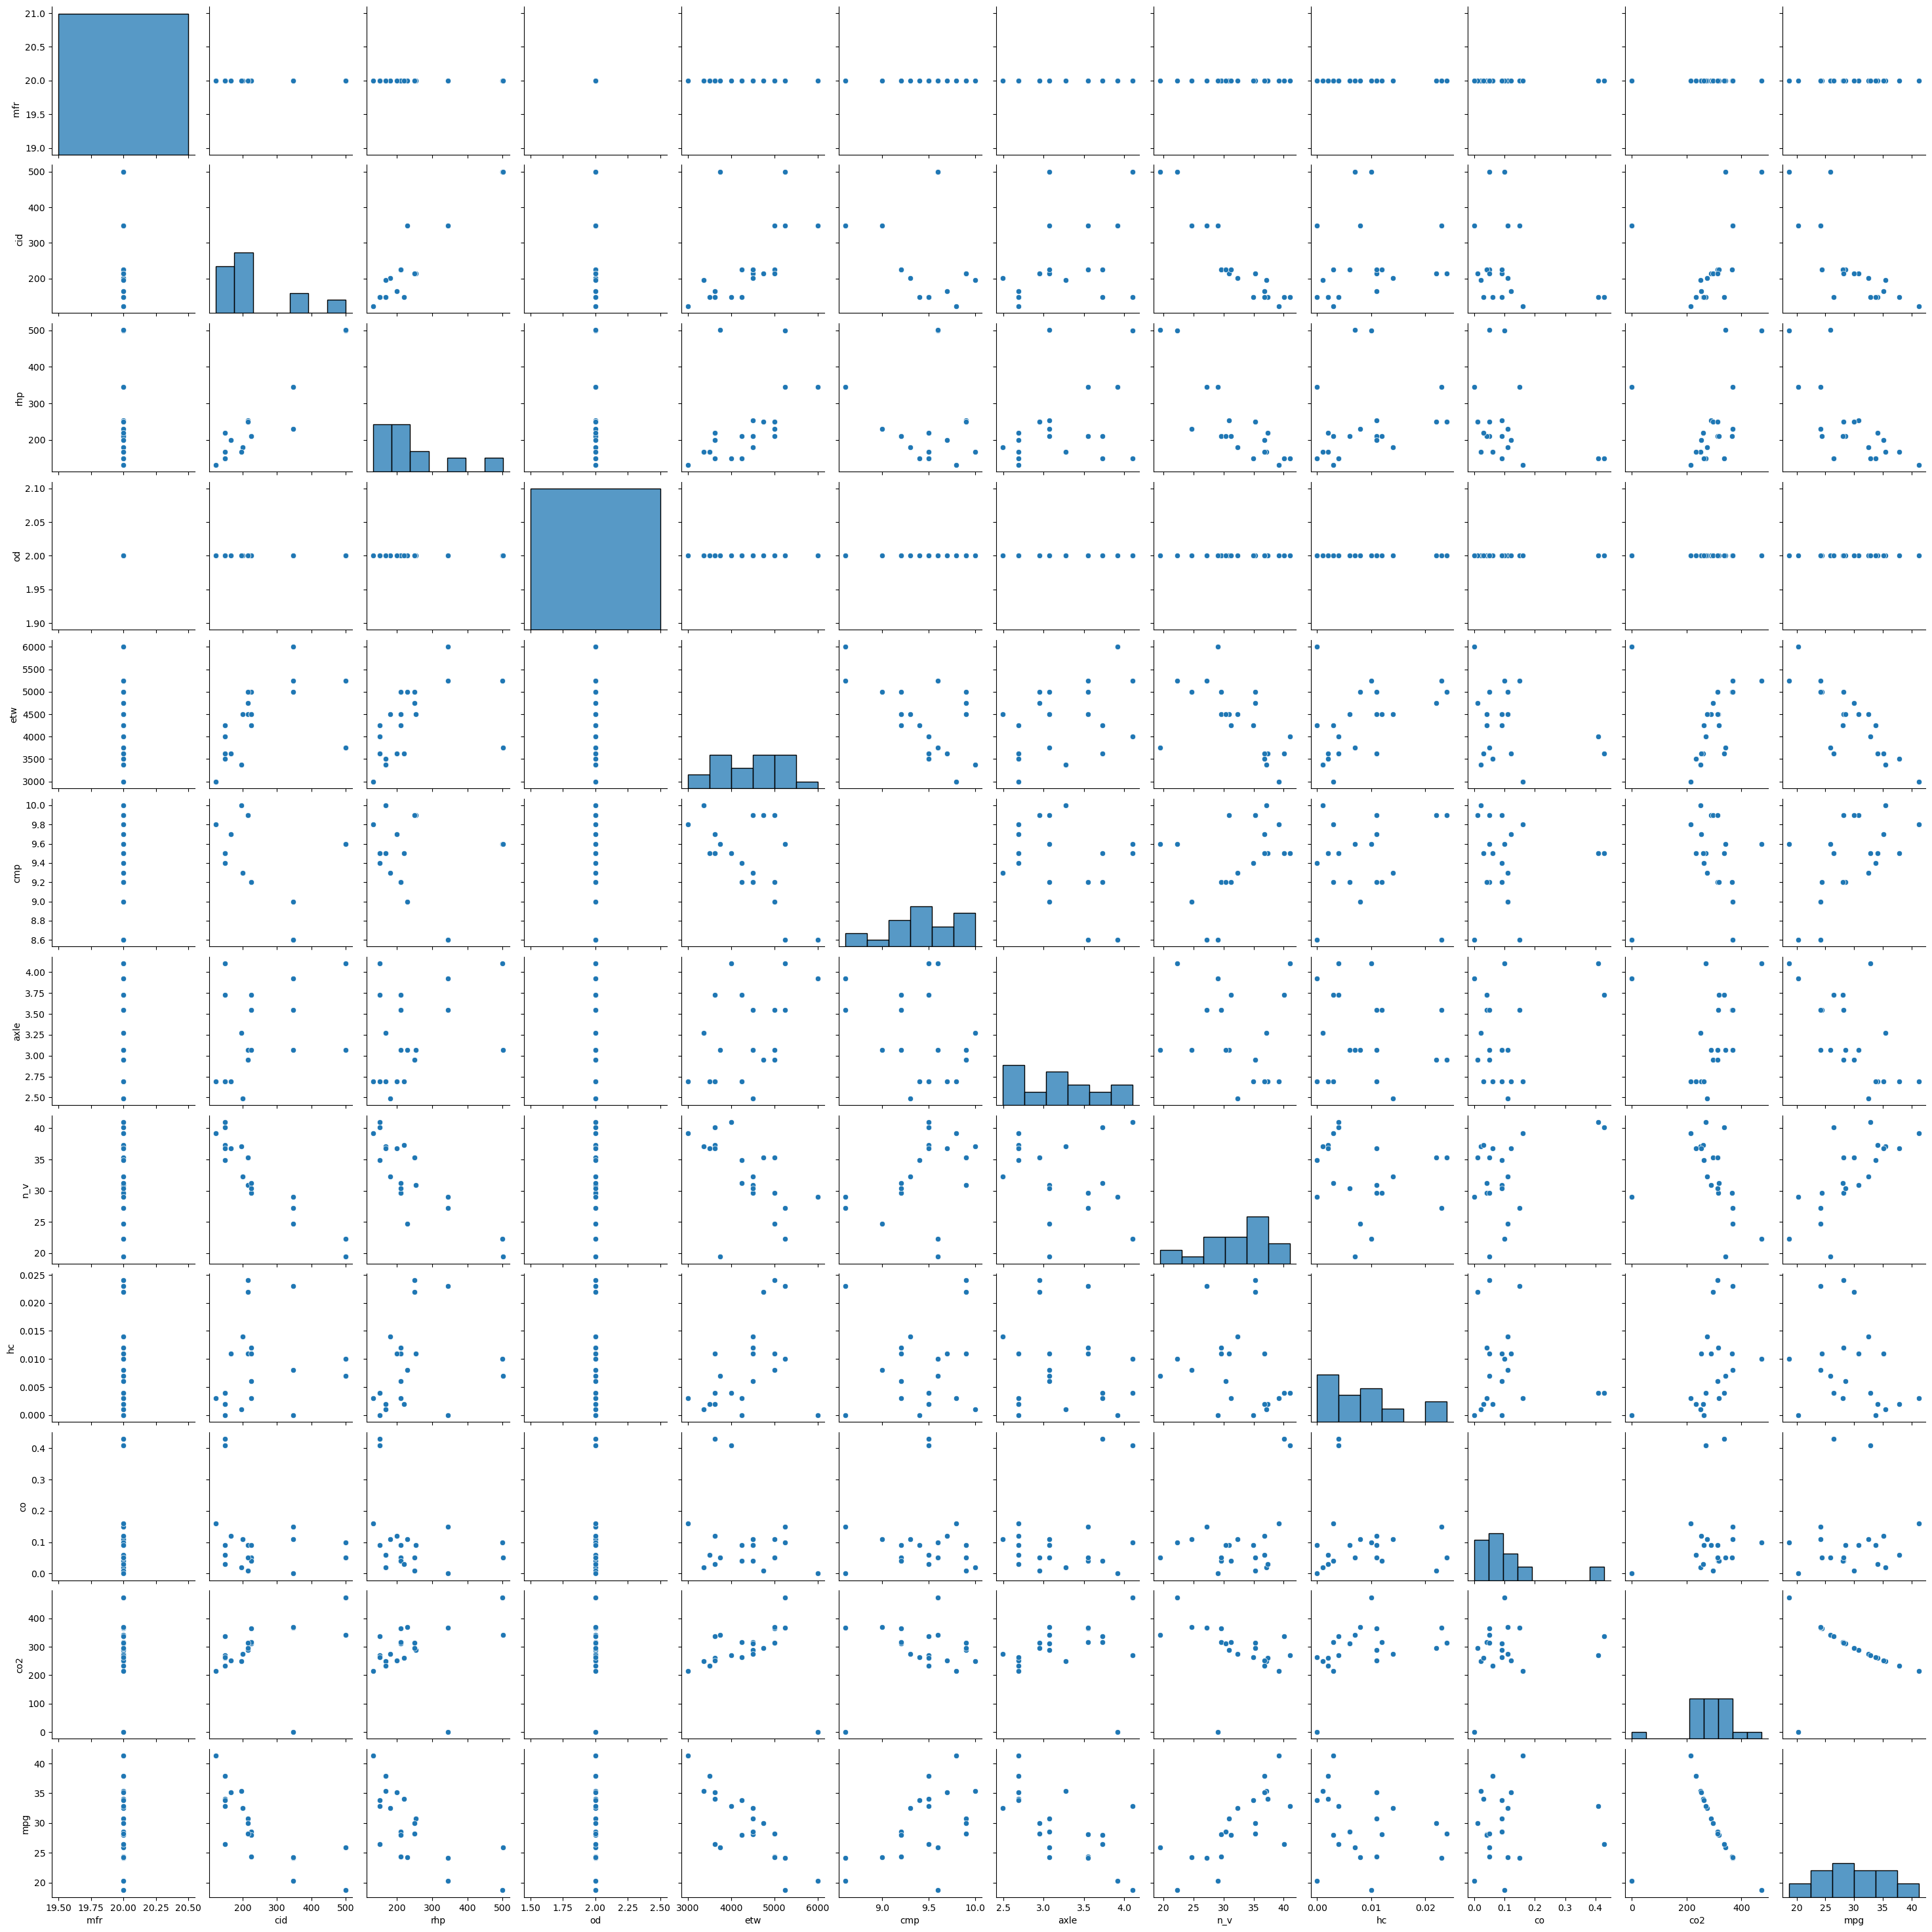

In [7]:
sns.pairplot(df);

In [11]:
#Preparing data set

selected_variables = ['cid', 'rhp', 'etw', 'cmp','axle', 'n_v']
X = df[selected_variables]
y = df['mpg']

# spliting into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=11)
print('Training observations are %d' % len(X_train))
print('Testing observations are %d' % len(X_test))

Training observations are 16
Testing observations are 5


In [16]:
#Model

#standardisation of the data set
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

reg = linear_model.LinearRegression()
reg.fit(X_train_scaler, y_train);

print('Independent variables: ', X_train.columns)
print('The estimated coefficients: ', reg.coef_)
print('The estimated intercept: ', reg.intercept_)

print('R^2 for training: %.2f' % reg.score(X_train_scaler, y_train))
print('R^2 for test: %.2f' % reg.score(X_test_scaler, y_test))

Independent variables:  Index(['cid', 'rhp', 'etw', 'cmp', 'axle', 'n_v'], dtype='object')
The estimated coefficients:  [-1.62254451 -0.98238507 -2.02776312  0.86351303 -1.6986343  -0.25822506]
The estimated intercept:  29.887499999999992
R^2 for training: 0.87
R^2 for test: 0.90


In [21]:
#trying statsmodel for details
X_train_scaled = sm.add_constant(X_train_scaler)
X_test_scaled = sm.add_constant(X_test_scaler)

model_train = sm.OLS(y_train, X_train_scaled).fit()
print(model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     9.640
Date:                Thu, 13 Jun 2024   Prob (F-statistic):            0.00171
Time:                        00:57:23   Log-Likelihood:                -32.274
No. Observations:                  16   AIC:                             78.55
Df Residuals:                       9   BIC:                             83.96
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8875      0.606     49.298      0.0

C:\Users\User15\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Interpretation:
1. R-square of both test and training data set have similar value which indicates good fit of the model without overfitting.
2. Model fits the data well and explains larger portion of it with higher r-square values.
3. Although model performs well, most of the predected variables co-eficient are insignificant (Most likely due to multicollinearity as some of them are postively correlated as shown in pairplot above).

## σ^2 and SE Estimation

Calculating $\hat{\sigma}^2$ as unbiased estiamtor of standard deviation

In [28]:
import scipy.stats as stats
from numpy.linalg import inv

# Getting predictions and calculating residuals for training data
y_train_pred = reg.predict(X_train_scaler)
residuals = y_train - y_train_pred

# Calculating the unbiased estimator of the variance of the error term (sigma^2) using (n - p)
n = len(X_train)  # total number of observations
k = X_train.shape[1]  # total number of independent variables
p = k + 1  # total number of parameters

sigma_squared = np.sum(residuals**2) / (n - p)
print(f"sigma^2: {sigma_squared}")

# Calculating standard errors of the regression coefficients using C matrix
X_train_with_intercept = np.hstack([np.ones((X_train_scaler.shape[0], 1)), X_train_scaler])
C = inv(np.dot(X_train_with_intercept.T, X_train_with_intercept))
var_b = sigma_squared * C.diagonal()
standard_errors = np.sqrt(var_b)

print(f"Standard errors of the regression coefficients with intercept:\n{standard_errors}")

sigma^2: 5.880799176619977
Standard errors of the regression coefficients with intercept:
[0.60625898 3.10478307 2.11587965 0.73232022 0.89954324 0.8096625
 2.43584746]


### Interpretation:

1. A high $\hat{\sigma}^2$ value indicates that there is a large amount of unexplained variability in the data. This suggests that the model does not fit the data very well, and the predictions made by the model may not be reliable.
   
2. The large standard errors for most of the estimated coefficients indicate high uncertainty in the estimates. This suggests that the model's coefficients may not be reliable, majorly due to multicollinearity, small sample size, or high variance in the predictor variables.

## Test for significance of regression
The corresponding hypotheses are
- $H_0$: $\beta_1 = \beta_2 = ... = \beta_k = 0$
- $H_1$: $\beta_i \neq 0$ for at least one i

We will reject $H_0$ when $F_0 \geq f_{\alpha, k, n-p}$. From the f test table, we know that $f_{0.05, 5, 114}=1.9$.

In [30]:
# Calculate the sum of squares
ss_total = np.sum((y_train - np.mean(y_train))**2)
ss_residual = np.sum(residuals**2)
ss_explained = ss_total - ss_residual

# Mean squares
ms_explained = ss_explained / k
ms_residual = ss_residual / (n - p)

# F-statistic
f_statistic = ms_explained / ms_residual
print(f"F-statistic: {f_statistic}")

# Critical value from the F-distribution
f_critical = stats.f.ppf(1 - 0.05, k, n - p)
print(f"Critical value for F-statistic at alpha 0.05: {f_critical}")

if f_statistic > f_critical:
    print("Reject the null hypothesis: The regression model is significant.")
else:
    print("Null hypothesis is not rejected.")


F-statistic: 9.639571572819008
Critical value for F-statistic at alpha 0.05: 3.373753647039214
Reject the null hypothesis: The regression model is significant.


### Interpretation:

Since f-value was greater than f-value corresponding to significance value 0.05, null hypothesis was rejected making regression model significant.

## t-test statistic for each independent variable

We perform hypothesis tests on the estimated coefficients by constructing:

- Null hypothesis $H_0$: $\beta_i=0$
- Alternative hypothesis $H_1$: $\beta_i \neq 0$

The $t$ test statistic will be:
\begin{equation}
    T_0 = \frac{\hat{\beta}_i-0}{se(\hat{\beta}_i)}
\end{equation}
where
\begin{equation}
    se(\hat{\beta}_i) = \hat{\sigma}^2 C_{ii}
\end{equation}
where
\begin{equation}
    C = (X^{\prime}X)^{-1}
\end{equation}


In [34]:
import scipy.stats as stats

n = len(y_train) # Number of observations and parameters
k = X_train.shape[1]  # number of independent variables
p = k + 1  # total number of parameters including intercept

#t-statistics for each coefficient
t_stats = coefficients / standard_errors
print(f"t-statistics for each coefficient: {t_stats}")

# Critical value for two-tailed t-test at alpha = 0.05
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, n - p)
print(f"Critical t-value at alpha 0.05: {t_critical}")

for i, (coef, t_stat, sig) in enumerate(zip(coefficients, t_stats, significant)):
    var_name = "Intercept" if i == 0 else selected_variables[i-1]
    significance = "significant" if sig else "not significant"
    print(f"Variable: {var_name}, Coefficient: {coef:.3f}, t-statistic: {t_stat:.3f}, {significance}")


t-statistics for each coefficient: [49.298239   -0.52259513 -0.46429156 -2.7689569   0.95994611 -2.09795353
 -0.10601036]
Critical t-value at alpha 0.05: 2.2621571627409915
Variable: Intercept, Coefficient: 29.887, t-statistic: 49.298, significant
Variable: cid, Coefficient: -1.623, t-statistic: -0.523, not significant
Variable: rhp, Coefficient: -0.982, t-statistic: -0.464, not significant
Variable: etw, Coefficient: -2.028, t-statistic: -2.769, significant
Variable: cmp, Coefficient: 0.864, t-statistic: 0.960, not significant
Variable: axle, Coefficient: -1.699, t-statistic: -2.098, not significant
Variable: n_v, Coefficient: -0.258, t-statistic: -0.106, not significant


### Interpretation:

Based on the hypothesis testing, we can draw the following conclusions:

Intercept: The intercept is highly significant with a t-statistic of 49.298. This means that even when all other variables are zero, the intercept term significantly contributes to the model.

etw: The variable etw (equivalent test weight) is also significant with a t-statistic of -2.769. This suggests that etw significantly contributes to the model and has a noticeable impact on the response variable.

Other Variables: The remaining variables (cid, rhp, cmp, axle, n_v) are not significant at the 0.05 significance level. This is indicated by their t-statistics, which are all less than the critical t-value of 2.262.

Reason: might be due to multicollinerity

## Confidence intervals on the regression coefficients

In [35]:
# Coefficients and standard errors calculation
coefficients = np.hstack([reg.intercept_, reg.coef_])
X_train_with_intercept = np.hstack([np.ones((X_train_scaler.shape[0], 1)), X_train_scaler])
sigma_squared = np.sum((y_train - reg.predict(X_train_scaler))**2) / (len(y_train) - X_train.shape[1] - 1)
C = inv(np.dot(X_train_with_intercept.T, X_train_with_intercept))
standard_errors = np.sqrt(np.diag(sigma_squared * C))

n = len(y_train)
p = X_train_with_intercept.shape[1]

# Calculate 99% confidence intervals for each coefficient
alpha = 0.01  # for 99% confidence interval
t_critical_99 = stats.t.ppf(1 - alpha / 2, n - p)

conf_intervals_99 = [
    (
        coef - t_critical_99 * se,
        coef + t_critical_99 * se
    ) for coef, se in zip(coefficients, standard_errors)
]

print("Confidence Intervals for each coefficient:")
for i, (lower, upper) in enumerate(conf_intervals_99):
    var_name = "Intercept" if i == 0 else selected_variables[i-1]
    print(f"Variable: {var_name}, 99% CI: [{lower:.4f}, {upper:.4f}]")

Confidence Intervals for each coefficient:
Variable: Intercept, 99% CI: [27.9173, 31.8577]
Variable: cid, 99% CI: [-11.7126, 8.4675]
Variable: rhp, 99% CI: [-7.8586, 5.8939]
Variable: etw, 99% CI: [-4.4077, 0.3522]
Variable: cmp, 99% CI: [-2.0599, 3.7869]
Variable: axle, 99% CI: [-4.3299, 0.9326]
Variable: n_v, 99% CI: [-8.1743, 7.6579]


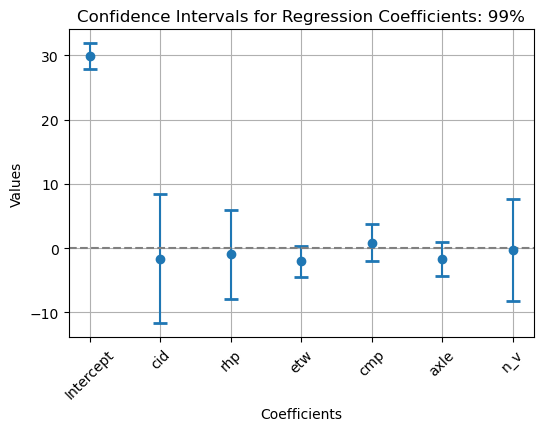

In [46]:
#Visualisations

# Variables and coefficients
variables = ["Intercept"] + selected_variables
coefficients_lower = [interval[0] for interval in conf_intervals_99]
coefficients_upper = [interval[1] for interval in conf_intervals_99]
errors = [upper - coef for coef, (_, upper) in zip(coefficients, conf_intervals_99)]

# Plotting
plt.figure(figsize=(6, 4))
plt.errorbar(variables, coefficients, yerr=errors, fmt='o', capsize=5, capthick=2)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Coefficients')
plt.ylabel('Values')
plt.title('Confidence Intervals for Regression Coefficients: 99%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Interpretation:
1. As intercept interval is different from centering zero, it seems to be statisically significant.
2. The rest all co-efficients are centered arround zero indicating that they might not be significant predictors in the model.

## Residual plots: response and predictor variables

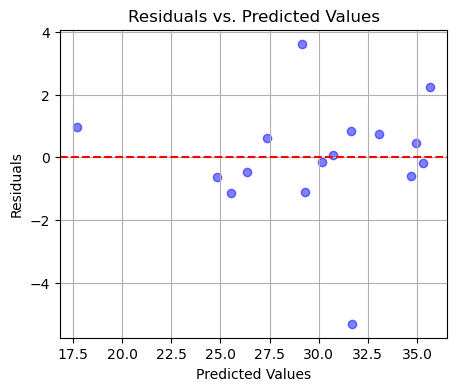

In [45]:
# Residuals
residuals = y_train - reg.predict(X_train_scaler)

# Predicted values
y_pred = reg.predict(X_train_scaler)

# Plot Residuals vs. Predicted Values
plt.figure(figsize=(5, 4))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

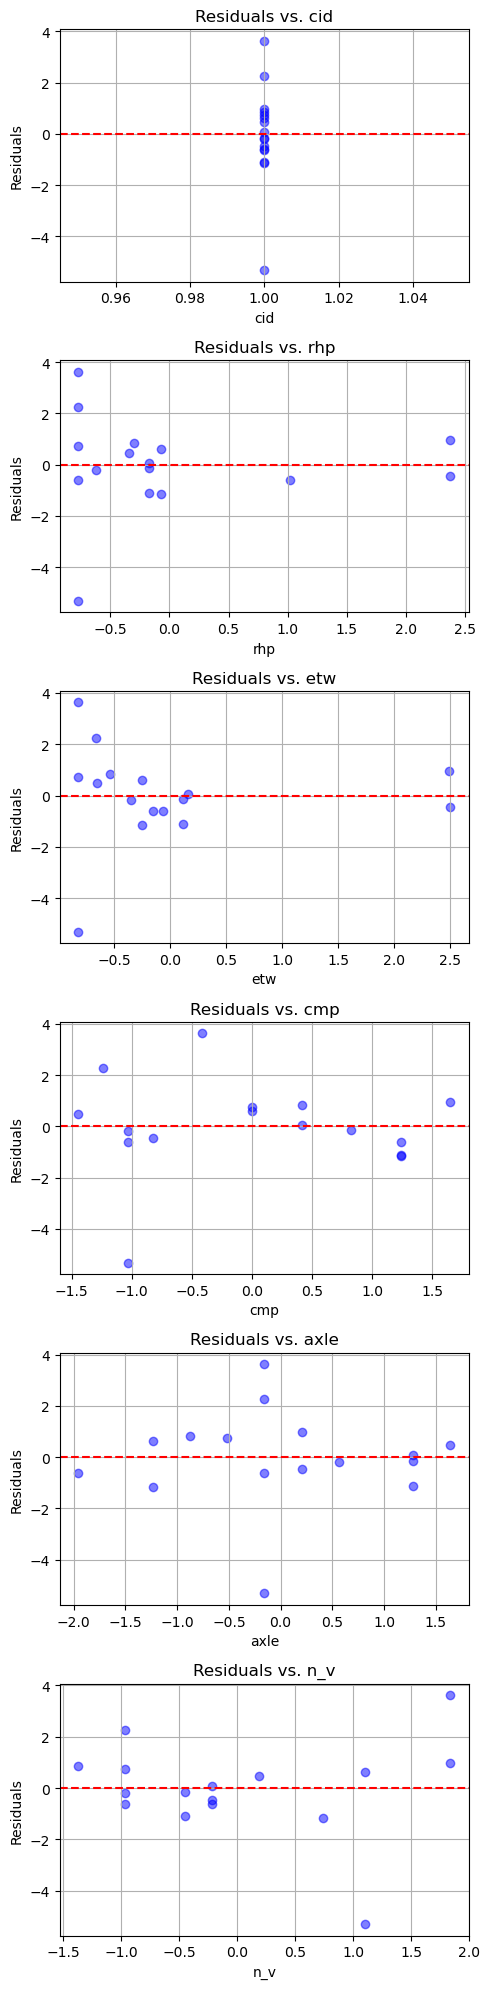

In [41]:
#Residuals vs. Independent Variable
fig, axs = plt.subplots(len(selected_variables), figsize=(5, 20))

for i, var in enumerate(selected_variables):
    axs[i].scatter(X_train_scaled[:, i], residuals, color='blue', alpha=0.5)
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Residuals')
    axs[i].grid(True)
    axs[i].set_title(f'Residuals vs. {var}')

plt.tight_layout()
plt.show()

### Interpretation:
1. Residuals are randomly distributed around the zero for all indepentdent variables except for cid and dependent variable, which indicates a good fit of the model to the data.
2. The residuals of cid appears to be centered around the same cid value suggesting  variance is not constant.

## Confidence limits and prediction limits for the mean response

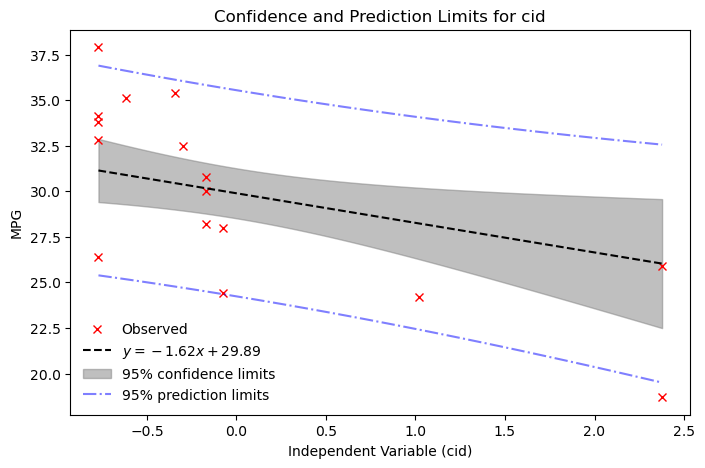

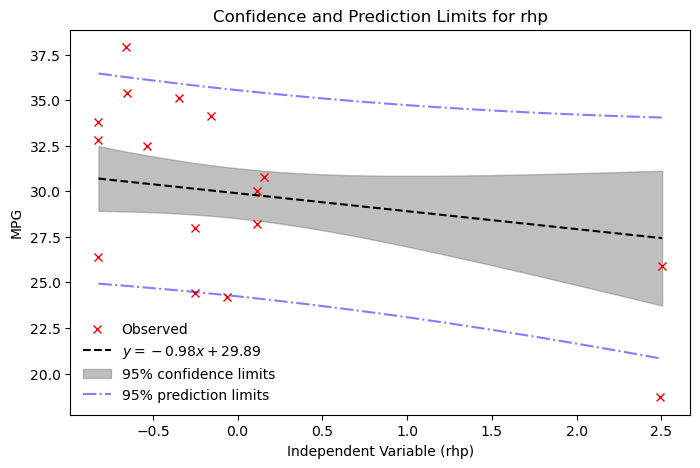

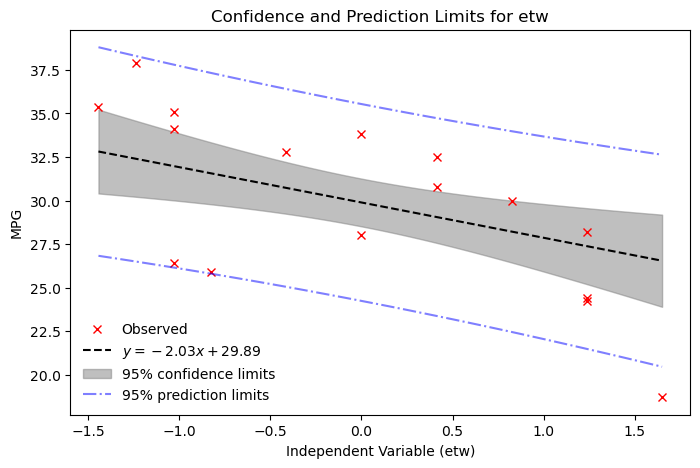

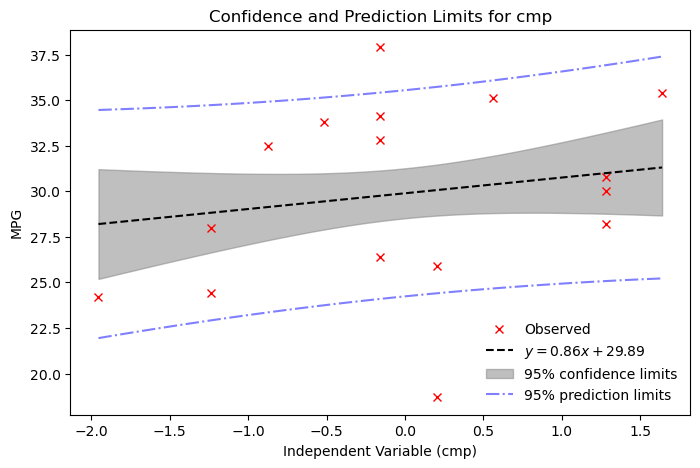

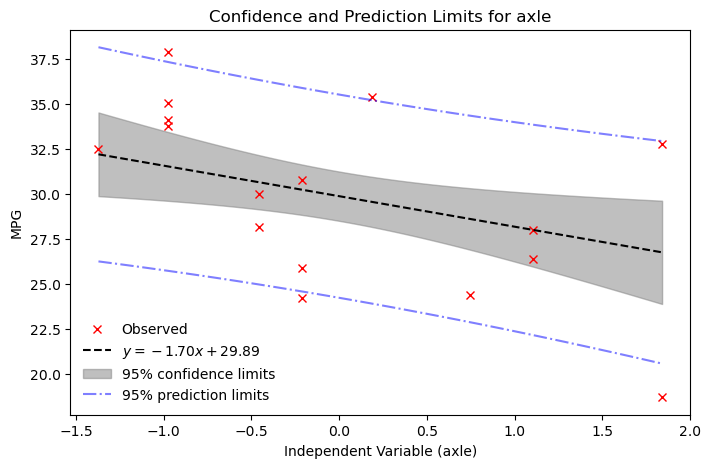

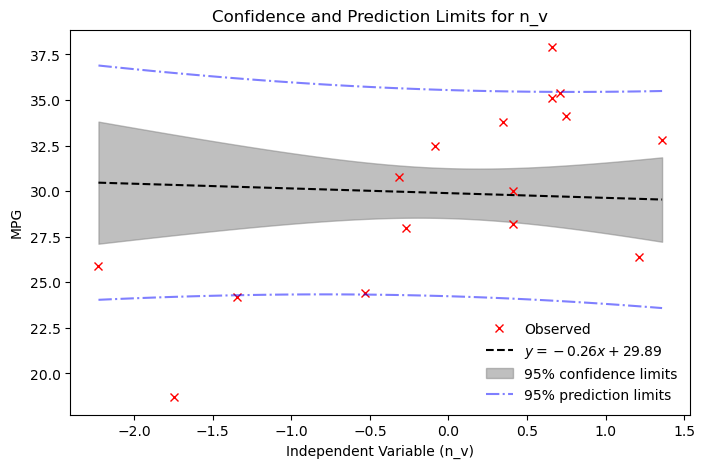

In [55]:
# Calculate the predicted values and residuals
y_train_pred = model.predict(X_train_scaler)
sigma_squared = np.sum((y_train - y_train_pred)**2) / (n - p)

# plots for each independent variable
n = X_train_scaler.shape[0]
k = X_train_scaler.shape[1]
p = k + 1 
alpha = 0.05
t_alpha = stats.t.ppf(1 - alpha / 2, n - p)
C = inv(np.dot(X_train_with_intercept.T, X_train_with_intercept))

# Loop through each independent variable
for i, var in enumerate(selected_variables):
    # Generate range for the variable
    x_range = np.linspace(X_train_scaler[:, i].min(), X_train_scaler[:, i].max(), 100)
    X_range_scaled = np.zeros((100, X_train_scaler.shape[1]))
    X_range_scaled[:, i] = x_range  # vary the current variable, keep others at 0 (mean of standardized data)

    # Intercept
    X_range_with_intercept = np.hstack([np.ones((X_range_scaled.shape[0], 1)), X_range_scaled])
    y_range = model.predict(X_range_scaled)

    # Sxx and mean_x for the selected variable
    Sxx = np.sum((X_train_scaler[:, i] - np.mean(X_train_scaler[:, i]))**2)
    mean_x = np.mean(X_train_scaler[:, i])

    # Confidence intervals
    y_low = y_range - t_alpha * np.sqrt(sigma_squared * (1/n + (x_range - mean_x)**2 / Sxx))
    y_up = y_range + t_alpha * np.sqrt(sigma_squared * (1/n + (x_range - mean_x)**2 / Sxx))

    # Prediction intervals
    y_low_pred = y_range - t_alpha * np.sqrt(sigma_squared * (1 + 1/n + (x_range - mean_x)**2 / Sxx))
    y_up_pred = y_range + t_alpha * np.sqrt(sigma_squared * (1 + 1/n + (x_range - mean_x)**2 / Sxx))
   
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(X_train_scaler[:, i], y_train, 'rx', label='Observed')
    ax.plot(x_range, y_range, 'k--', label=f'$y={model.coef_[i]:.2f}x + {model.intercept_:.2f}$')
    ax.fill_between(x_range, y_low, y_up, color='grey', alpha=0.5, label='95% confidence limits')
    ax.plot(x_range, y_low_pred, color='b', alpha=0.5, linestyle='-.', label='95% prediction limits')
    ax.plot(x_range, y_up_pred, color='b', alpha=0.5, linestyle='-.')

    ax.set_xlabel(f'Independent Variable ({var})')
    ax.set_ylabel('MPG')
    ax.legend(frameon=False)
    plt.title(f'Confidence and Prediction Limits for {var}')
    plt.show()